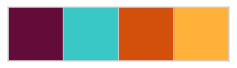

In [1]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or 'retina'
%matplotlib inline


# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, \
                            classification_report, precision_recall_curve, log_loss

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
import imblearn.over_sampling

sns.set(context='notebook', style='whitegrid')
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


In [2]:
%store -r weather_feature_sel

In [3]:
weather_feature_sel.head()

,Evaporation,Cloud3pm,WindGustSpeed,WindSpeed9am,Humidity3pm,Temp9am,Sunshine,Month_Name,Location,RainTomorrow
6049,12.0,5.0,48.0,6.000000,13.0,26.600000,12.3,Jan,Cobar,No
6050,14.8,1.0,37.0,19.000000,8.0,20.300000,13.0,Jan,Cobar,No
6051,12.6,1.0,30.0,14.636516,7.0,18.084507,13.3,Jan,Cobar,No
6052,10.8,6.0,46.0,30.000000,22.0,28.700000,10.6,Jan,Cobar,No
6053,11.4,5.0,31.0,6.000000,22.0,29.100000,12.2,Jan,Cobar,No


In [4]:
weather_feature_sel.shape

(142193, 10)

In [5]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
weather_feature_sel['RainTomorrow']= le.fit_transform(weather_feature_sel['RainTomorrow'])

## Dummy Encoding Categorical Variables


In [6]:
weather_feature_sel = pd.get_dummies(data=weather_feature_sel, columns=['Month_Name', 'Location'])

In [7]:
weather_feature_sel = weather_feature_sel [['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am',
       'Humidity3pm', 'Temp9am', 'Sunshine', 'Month_Name_Apr',
       'Month_Name_Aug', 'Month_Name_Dec', 'Month_Name_Feb', 'Month_Name_Jan',
       'Month_Name_Jul', 'Month_Name_Jun', 'Month_Name_Mar', 'Month_Name_May',
       'Month_Name_Nov', 'Month_Name_Oct', 'Month_Name_Sep',
       'Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera','RainTomorrow']]

In [8]:
X = weather_feature_sel.iloc[:, :68]
y = weather_feature_sel['RainTomorrow']

## Train, test and validation splits with over_sampling on train set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify = y_train) # 0.25 x 0.8 = 0.2

In [11]:
ROS = imblearn.over_sampling.RandomOverSampler( random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

## Scaling Using Standard Scalar


In [12]:
scaler = StandardScaler()

X_tr_rs[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']] = scaler.fit_transform(X_tr_rs[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']])
X_val[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']] = scaler.fit_transform(X_val[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']])
X_test[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']] = scaler.fit_transform(X_test[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']])

<ipython-input-12-21afe109419a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']] = scaler.fit_transform(X_test[['Evaporation', 'Cloud3pm', 'WindGustSpeed', 'WindSpeed9am', 'Humidity3pm', 'Temp9am', 'Sunshine']])
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].

In [13]:
y_train = y_tr_rs

In [14]:
X_train_scaled = X_tr_rs
X_val_scaled = X_val
X_test_scaled = X_test

## Predicting on Validation Set

In [15]:
lm1 = LogisticRegression(C=10 ) # setting C very high essentially removes regularization
lm1.fit(X_train_scaled, y_train)

LogisticRegression(C=10)

In [16]:
#y_train_pred = lm1.predict(X_train_scaled)
y_val_pred = lm1.predict(X_val_scaled)

In [17]:
accuracy = metrics.accuracy_score(y_val, y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred)
recall = metrics.recall_score(y_val, y_val_pred)
f1 = metrics.f1_score(y_val, y_val_pred)

print("Validation Set Accuracy:" , round(accuracy, 3))
print("Validation Set Precision:", round(precision, 3))
print("Validation Set Recall:", round(recall, 3))
print("Validation Set F1 Score:", round(f1, 3))

Validation Set Accuracy: 0.693
Validation Set Precision: 0.413
Validation Set Recall: 0.874
Validation Set F1 Score: 0.561


## Precision Recall Curve

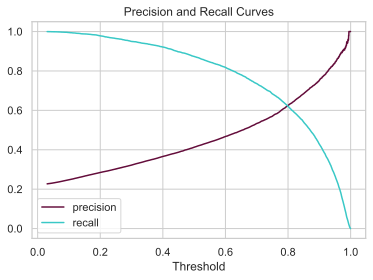

In [18]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lm1.predict_proba(X_val_scaled)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

## Updated threshold

In [19]:
def make_confusion_matrix(model, threshold=0.8):
    y_predict = (model.predict_proba(X_val_scaled)[:, 1] >= threshold)
    rain_matrix = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=150)
    sns.heatmap(rain_matrix, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
           xticklabels=['No Rain', 'Rain'],
           yticklabels=['No Rain', 'Rain']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22063
           1       0.63      0.62      0.62      6376

    accuracy                           0.83     28439
   macro avg       0.76      0.76      0.76     28439
weighted avg       0.83      0.83      0.83     28439



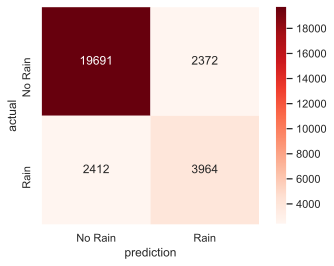

In [20]:
make_confusion_matrix(lm1)


In [21]:
fpr, tpr, thresholds = roc_curve(y_val, lm1.predict_proba(X_val_scaled)[:,1])


ROC AUC score =  0.8586860465334499


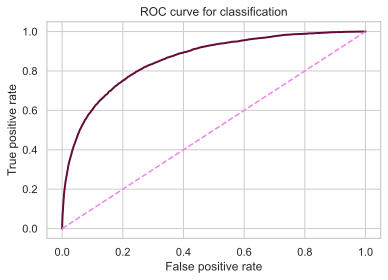

In [22]:
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for classification');

print("ROC AUC score = ", roc_auc_score(y_val, lm1.predict_proba(X_val_scaled)[:,1]))

In [23]:
print("Log-loss on lm1: {:6.4f}".format(log_loss(y_val, lm1.predict_proba(X_val_scaled))))


Log-loss on lm1: 0.6103


## GridSearch CV 

In [24]:
from sklearn.model_selection import GridSearchCV


penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100,1000]
param_grid = dict(C=C, penalty=penalty)
lr_grid_search = LogisticRegression()
lr_grid = GridSearchCV(lr_grid_search, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1, refit = True)
lr_grid.fit(X_train_scaled, y_train)
lr_grid_preds = lr_grid.predict(X_val_scaled)

lr_grid_best_params = lr_grid.best_params_
lr_grid_best_estimator = lr_grid.best_estimator_
lr_grid_best_cm = confusion_matrix(y_val,lr_grid_preds)
lr_grid_best_cr = classification_report(y_val,lr_grid_preds)
print(lr_grid_best_params, lr_grid_best_estimator, lr_grid_best_cm, lr_grid_best_cr)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.77105018        nan 0.7751382         nan 0.7757441
        nan 0.77572974        nan 0.77576357        nan 0.77576357
        nan 0.77575768]
  warnings.warn(


{'C': 10, 'penalty': 'l2'} LogisticRegression(C=10) [[14145  7918]
 [  806  5570]]               precision    recall  f1-score   support

           0       0.95      0.64      0.76     22063
           1       0.41      0.87      0.56      6376

    accuracy                           0.69     28439
   macro avg       0.68      0.76      0.66     28439
weighted avg       0.83      0.69      0.72     28439



In [25]:
lr_grid_y_score = lr_grid.predict_proba(X_val_scaled)[:, 1]
lr_grid_fpr, lr_grid_tpr, auc_thresholds = roc_curve(y_val, lr_grid_y_score)
roc_auc_lr_grid = auc(lr_grid_fpr, lr_grid_tpr)
print(roc_auc_lr_grid )

0.8586860465334499


## Tuning with Best Parameters to Predict on Test Data


In [26]:
lm2 = LogisticRegression(C= 10, penalty = 'l2')
lm2.fit(X_train_scaled, y_train)
lm2_pred = lm2.predict(X_test_scaled)

lm2_ac = lm2.score(X_test_scaled, y_test)
lm2_precision = precision_score(y_test, lm2_pred)
lm2_recall = recall_score(y_test, lm2_pred)
lm2_f1 = f1_score(y_test, lm2_pred)

lm2_y_score = lm2.predict_proba(X_test_scaled)[:, 1]
lm2_fpr, lm2_tpr, auc_thresholds = roc_curve(y_test, lm2_y_score)
roc_auc_lm2 = auc(lm2_fpr, lm2_tpr)

In [27]:
print('Logistic Regression test score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lm2_ac, 
         lm2_precision, 
         lm2_recall,
         lm2_f1,
         roc_auc_lm2)
     )

Logistic Regression test score: 
 Accuracy: 0.6951 
 Precision: 0.4146 
 Recall: 0.8739 
 F1: 0.5624 
 ROC: 0.8586


In [28]:
def make_confusion_matrix(model, threshold=0.8):
    y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= threshold)
    rain_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=250)
    sns.heatmap(rain_matrix, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
           xticklabels=['No Rain', 'Rain'],
           yticklabels=['No Rain', 'Rain']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22064
           1       0.62      0.62      0.62      6375

    accuracy                           0.83     28439
   macro avg       0.75      0.75      0.75     28439
weighted avg       0.83      0.83      0.83     28439



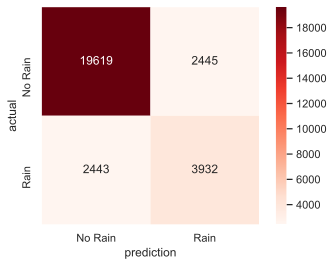

In [29]:
make_confusion_matrix(lm2)


## Feature Importance

Feature_Name: Evaporation,Score: 1.27011
Feature_Name: Cloud3pm,Score: 0.87158
Feature_Name: WindGustSpeed,Score: 0.69985
Feature_Name: WindSpeed9am,Score: 0.58201
Feature_Name: Humidity3pm,Score: 0.56811
Feature_Name: Temp9am,Score: 0.56280
Feature_Name: Sunshine,Score: 0.52065
Feature_Name: Month_Name_Apr,Score: 0.44859
Feature_Name: Month_Name_Aug,Score: 0.41381
Feature_Name: Month_Name_Dec,Score: 0.39695
Feature_Name: Month_Name_Feb,Score: 0.39384
Feature_Name: Month_Name_Jan,Score: 0.33722
Feature_Name: Month_Name_Jul,Score: 0.32707
Feature_Name: Month_Name_Jun,Score: 0.31487
Feature_Name: Month_Name_Mar,Score: 0.30172
Feature_Name: Month_Name_May,Score: 0.29609
Feature_Name: Month_Name_Nov,Score: 0.29604
Feature_Name: Month_Name_Oct,Score: 0.27638
Feature_Name: Month_Name_Sep,Score: 0.27449
Feature_Name: Location_Adelaide,Score: 0.22236
Feature_Name: Location_Albany,Score: 0.21956
Feature_Name: Location_Albury,Score: 0.19537
Feature_Name: Location_AliceSprings,Score: 0.18796
Feat

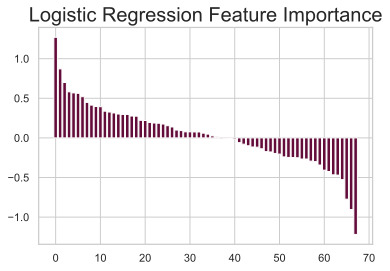

In [33]:
## get importance
import numpy as np
importance = lm2.coef_[0]
importance = np.sort(importance)
reverse_array = importance[::-1]
column_names = X_train.columns.tolist()
# summarize feature importance
for i,v in enumerate(reverse_array):
    y=column_names[i]
    print('Feature_Name: %s,Score: %.5f' % (y,v))
# plot feature importance
plt.figure(dpi=150)
plt.bar([x for x in range(len(reverse_array))], reverse_array)
plt.title('Logistic Regression Feature Importance', fontsize=20) ## Sorting according - rank - most positive to negative
plt.show()